## 3. Getting Started with Neural Networks

### Classifying newswires: A Multiclass Classification Example
In the **reuters** problem, we want to classify newswires to one of 46 mutually exclusive topics. Since the number of classes is more than 2, this is a multiclass classification problem, extending from the binary classification problem.

In [1]:
from keras.datasets import reuters

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from keras.utils.np_utils import to_categorical
from keras import models
from keras import layers

Using TensorFlow backend.


In [2]:
##########
# Ingestion
##########
VOCABULARY_SIZE = 10000
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=VOCABULARY_SIZE)

This is the Reuters dataset, a set of short newswires and their topics, published by Reuters in 1986. 

The data consists of 8982 training examples and 2246 test examples. Similarly each document is stored as a word vector. The labels are one of the 46 topics.

In [3]:
# For testing
# print([td[:15] for td in train_data[0:3]])
# print(train_labels[0:3])

Preprocessing follows that in the **reviews** problem for the input data. 

For the labels, we can cast the label list as an integer tensor, or one-hot encode the categorical data. We will do one-hot encoding.

Note that if we use the integer tensor way, then the loss function will be `sparse_categorical_crossentropy`.

In [4]:
##########
# Preprocessing
##########
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
          results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

# Train-Validation Split
x_train__train, x_train__val, y_train__train, y_train__val = train_test_split(x_train, y_train, test_size=0.15,
                                                                             random_state=0)

For this problem, a 16-dimensional space might be too limited to learn to separate 46 different classes. For this, we go with a larger layer with 64 units.

Also, for the last layer, we now use a softmax function because this is a multiclass problem with more than 2 classes. Note that the 46 probabilities from the output layer will sum to $1$ too.

The network ends with a dense layer of size 46 to represent the 46 different categories. Each entry will encode a different output class.

In [5]:
##########
# Instantiate Model
##########
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(VOCABULARY_SIZE,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

We use the same workflow and now will compile the model. This time the loss function changes to `categorical_crossentropy`.

In [6]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

We will train the network on 20 epochs

In [7]:
##########
# Train / Model Tuning
##########
history = model.fit(x_train__train, y_train__train, 
                    epochs=20, batch_size=512, 
                    validation_data=(x_train__val, y_train__val))

Train on 7634 samples, validate on 1348 samples
Epoch 1/20
7634/7634 [==============================] - 2s 224us/step - loss: 2.6801 - accuracy: 0.5179 - val_loss: 1.7398 - val_accuracy: 0.6706
Epoch 2/20
7634/7634 [==============================] - 1s 138us/step - loss: 1.4373 - accuracy: 0.7096 - val_loss: 1.2920 - val_accuracy: 0.7322
Epoch 3/20
7634/7634 [==============================] - 1s 163us/step - loss: 1.0497 - accuracy: 0.7846 - val_loss: 1.1351 - val_accuracy: 0.7530
Epoch 4/20
7634/7634 [==============================] - 1s 158us/step - loss: 0.8273 - accuracy: 0.8274 - val_loss: 1.0442 - val_accuracy: 0.7797
Epoch 5/20
7634/7634 [==============================] - 1s 188us/step - loss: 0.6628 - accuracy: 0.8626 - val_loss: 0.9735 - val_accuracy: 0.7826
Epoch 6/20
7634/7634 [==============================] - 1s 144us/step - loss: 0.5361 - accuracy: 0.8884 - val_loss: 0.9528 - val_accuracy: 0.7841
Epoch 7/20
7634/7634 [==============================] - 1s 146us/step - loss

Let's plot the loss and accuracy curves.

/Users/bryanlim/.pyenv/versions/3.7.2/envs/botanic/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/bryanlim/.pyenv/versions/3.7.2/envs/botanic/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/bryanlim/.pyenv/versions/3.7.2/envs/botanic/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.


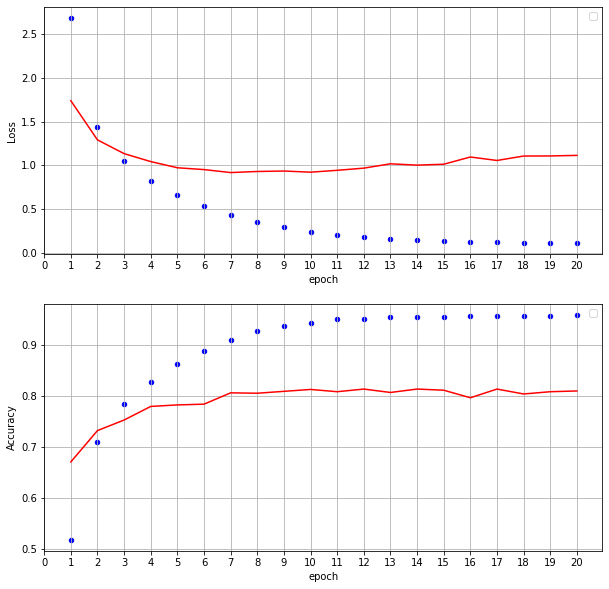

In [8]:
history_dict = history.history
metrics_df = pd.DataFrame({'loss' : history_dict['loss'], 'val_loss' : history_dict['val_loss'],
                          'accuracy' : history_dict['accuracy'], 'val_accuracy' : history_dict['val_accuracy']})
metrics_df['epoch'] = metrics_df.index+1

fig = plt.figure(figsize=(10,10))
ax1, ax2 = fig.add_subplot(2,1,1), fig.add_subplot(2,1,2)
metrics_df.plot(kind='scatter', x='epoch', y='loss', ax=ax1, label='train', color='blue')
metrics_df.plot(kind='line', x='epoch', y='val_loss', ax=ax1, label='validation', color='red',)
ax1.set_ylabel("Loss")
ax1.grid('GAINSBORO')
ax1.legend([])
ax1.set_xticks(range(0,21))

metrics_df.plot(kind='scatter', x='epoch', y='accuracy', ax=ax2, label='train', color='blue')
metrics_df.plot(kind='line', x='epoch', y='val_accuracy', ax=ax2, label='validation', color='red',)
ax2.set_ylabel("Accuracy")
ax2.grid('GAINSBORO')
ax2.set_xticks(range(0,21))
ax2.legend([])
plt.show()

For this, the network starts to overfit after 9 epochs. So we train a new network on the 9 epochs and use this on the test set.

In [9]:
##########
# Train Tuned Model
##########
model2 = models.Sequential()
model2.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(46, activation='softmax'))

model2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model2.fit(x_train__train, y_train__train, 
           epochs=9, batch_size=512, 
           validation_data=(x_train__val, y_train__val))

Train on 7634 samples, validate on 1348 samples
Epoch 1/9
7634/7634 [==============================] - 2s 214us/step - loss: 2.6977 - accuracy: 0.5151 - val_loss: 1.7273 - val_accuracy: 0.6691
Epoch 2/9
7634/7634 [==============================] - 1s 147us/step - loss: 1.4365 - accuracy: 0.7026 - val_loss: 1.3043 - val_accuracy: 0.7263
Epoch 3/9
7634/7634 [==============================] - 1s 159us/step - loss: 1.0559 - accuracy: 0.7744 - val_loss: 1.1471 - val_accuracy: 0.7648
Epoch 4/9
7634/7634 [==============================] - 1s 151us/step - loss: 0.8280 - accuracy: 0.8238 - val_loss: 1.0568 - val_accuracy: 0.7774
Epoch 5/9
7634/7634 [==============================] - 1s 167us/step - loss: 0.6610 - accuracy: 0.8573 - val_loss: 0.9956 - val_accuracy: 0.7908
Epoch 6/9
7634/7634 [==============================] - 1s 159us/step - loss: 0.5266 - accuracy: 0.8934 - val_loss: 0.9578 - val_accuracy: 0.8012
Epoch 7/9
7634/7634 [==============================] - 1s 146us/step - loss: 0.421

In [10]:
##########
# Evaluate on Test Set
##########
results = model2.evaluate(x_test, y_test)
print(results)

2246/2246 [==============================] - 1s 293us/step
[0.9781410946765332, 0.7916295528411865]


The final accuracy for the model is 79%.

For the softmax problem, the output class is the class with the highest probability.

In [11]:
##########
# Predict
##########
prediction_probs = model2.predict(x_test)
print(prediction_probs[0].shape)
print(prediction_probs[0])
print(np.sum(prediction_probs[0])) # sums to 1
print(np.argmax(prediction_probs[0])) # sums to 1

(46,)
[2.1319839e-04 5.6695560e-04 8.5935790e-05 9.1823786e-01 5.4409511e-02
 4.2418309e-05 4.1385356e-04 1.2296803e-04 4.2097443e-03 4.3482435e-04
 4.0947367e-04 4.0250167e-04 5.2805670e-04 5.8899546e-04 2.4064450e-04
 2.2589864e-04 2.4976006e-03 3.5916158e-04 1.7567402e-04 8.4789265e-03
 9.6042961e-04 2.8023732e-04 3.6053825e-05 9.2828716e-04 7.0048103e-05
 3.7623732e-04 5.4751296e-04 4.1950436e-05 4.6452996e-04 2.3327624e-04
 1.4909316e-04 5.3410017e-04 2.1194706e-05 2.0779729e-05 4.1986539e-05
 4.1704257e-06 1.9494286e-04 7.5887633e-04 2.0173863e-04 3.0133824e-04
 6.8227359e-04 1.8039605e-04 1.2039105e-04 1.4595005e-04 3.6131547e-05
 2.3843990e-05]
1.0000001
3


Here is how to update the framing of the model when using the integer tensor.

In [12]:
ytrain_int = np.array(train_labels)
ytest_int = np.array(test_labels)

# Train-Validation Split
x_train2__train, x_train2__val, y_train2__train, y_train2__val = train_test_split(x_train, ytrain_int, test_size=0.15,
                                                                             random_state=0)

In [13]:
# We shall use the tuned parameters for this model
model3 = models.Sequential()
model3.add(layers.Dense(64, activation='relu', input_shape=(VOCABULARY_SIZE,)))
model3.add(layers.Dense(64, activation='relu'))
model3.add(layers.Dense(46, activation='softmax'))

model3.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model3.fit(x_train2__train, y_train2__train, 
           epochs=9, batch_size=512, 
           validation_data=(x_train2__val, y_train2__val))

Train on 7634 samples, validate on 1348 samples
Epoch 1/9
7634/7634 [==============================] - 3s 394us/step - loss: 2.6453 - accuracy: 0.4750 - val_loss: 1.7587 - val_accuracy: 0.6558
Epoch 2/9
7634/7634 [==============================] - 1s 183us/step - loss: 1.4545 - accuracy: 0.7050 - val_loss: 1.3366 - val_accuracy: 0.7285
Epoch 3/9
7634/7634 [==============================] - 1s 178us/step - loss: 1.0615 - accuracy: 0.7805 - val_loss: 1.1633 - val_accuracy: 0.7530
Epoch 4/9
7634/7634 [==============================] - 1s 171us/step - loss: 0.8340 - accuracy: 0.8268 - val_loss: 1.0717 - val_accuracy: 0.7760
Epoch 5/9
7634/7634 [==============================] - 1s 169us/step - loss: 0.6656 - accuracy: 0.8596 - val_loss: 1.0214 - val_accuracy: 0.7871
Epoch 6/9
7634/7634 [==============================] - 1s 191us/step - loss: 0.5343 - accuracy: 0.8872 - val_loss: 0.9906 - val_accuracy: 0.7960
Epoch 7/9
7634/7634 [==============================] - 1s 184us/step - loss: 0.429

In [14]:
results2 = model3.evaluate(x_test, ytest_int)
print(results2)

2246/2246 [==============================] - 0s 146us/step
[0.9897002526297701, 0.7889581322669983]


In [15]:
##########
# Predict using the integer tensor method
##########
prediction_probs2 = model3.predict(x_test)
print(prediction_probs2[0].shape)
print(prediction_probs2[0])
print(np.sum(prediction_probs2[0])) # sums to 1
print(np.argmax(prediction_probs2[0])) # sums to 1

(46,)
[2.00937011e-05 4.75303648e-04 5.48469361e-05 9.71745431e-01
 6.83764648e-03 1.01447531e-05 8.80928055e-05 5.78742438e-05
 9.53069143e-03 3.97691401e-05 4.37089839e-05 8.08792131e-04
 4.39594296e-05 1.14097353e-03 3.65021871e-04 1.15519115e-05
 2.31776881e-04 1.81775558e-05 1.55314883e-05 4.01448272e-03
 1.40220136e-03 6.57891433e-05 8.54663813e-05 4.51777705e-05
 9.07900994e-06 7.11566099e-05 3.51785934e-06 1.92862262e-06
 2.44562951e-04 1.68944553e-05 5.03640804e-05 5.58470929e-05
 2.64553411e-04 4.25675807e-07 5.87548653e-04 4.81367749e-07
 7.42216012e-04 4.75376191e-06 2.77122545e-05 3.89154331e-04
 3.20099556e-04 1.33315680e-05 6.28044381e-06 2.67464784e-05
 2.26579914e-06 8.56229781e-06]
1.0
3
